## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# merge_df.head()

# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = len(merged_df['Mouse ID'].unique())
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
sorted_df = merged_df.sort_values(['Mouse ID', 'Timepoint'])
sorted_df.head()
grouped_mice = sorted_df.groupby(['Mouse ID'])
grouped_mice.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stat = merged_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tvol_mean = summary_stat['Tumor Volume (mm3)'].mean()
# tvol_mean
tvol_median = summary_stat['Tumor Volume (mm3)'].median()
# tvol_median

tvol_std = summary_stat['Tumor Volume (mm3)'].std()
# tvol_std

tvol_sem = summary_stat['Tumor Volume (mm3)'].sem()
# tvol_sem

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({'Mean':tvol_mean, 'Median':tvol_median,
                          'Standard Deviation':tvol_std, 'SEM':tvol_sem})
summary_df

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# numpy_summary = merge_data.groupby
# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

(0.0, 280.0)

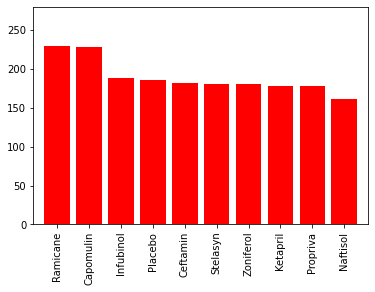

In [60]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
x_axis = merged_df['Drug Regimen'].unique()
# x_axis
y_axis = merged_df['Drug Regimen'].value_counts()
# y_axis
plt.bar(x_axis,y_axis,color='r',alpha=1,align='center')

# tickers I think
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = 90)

# set x and y limits??
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0,max(y_axis)+50)


In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



([<matplotlib.patches.Wedge at 0x1e4ea185580>,
 [Text(-1.0275907656213885, -0.6197235015792516, 'Males'),
  Text(0.941958201819606, 0.5680798764476476, 'Females')],
 [Text(-0.5994279466124767, -0.3615053759212301, '50.61%'),
  Text(0.5137953828106941, 0.3098617507896259, '49.39%')])

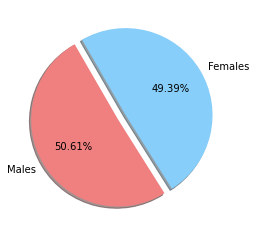

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# labels for sex of mice
labels = ['Males', 'Females']

# values of the sex
sizes = merged_df['Sex'].value_counts()

# Colors
colors = ['lightcoral', 'lightskyblue']

# first time trying this explode feature
explode = (0.1, 0)

#creating the actual pie chart
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct="%1.2f%%", shadow = True, startangle = 120)


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
